In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

### Plot The Baggage Revenue by Quarter of All Airlines

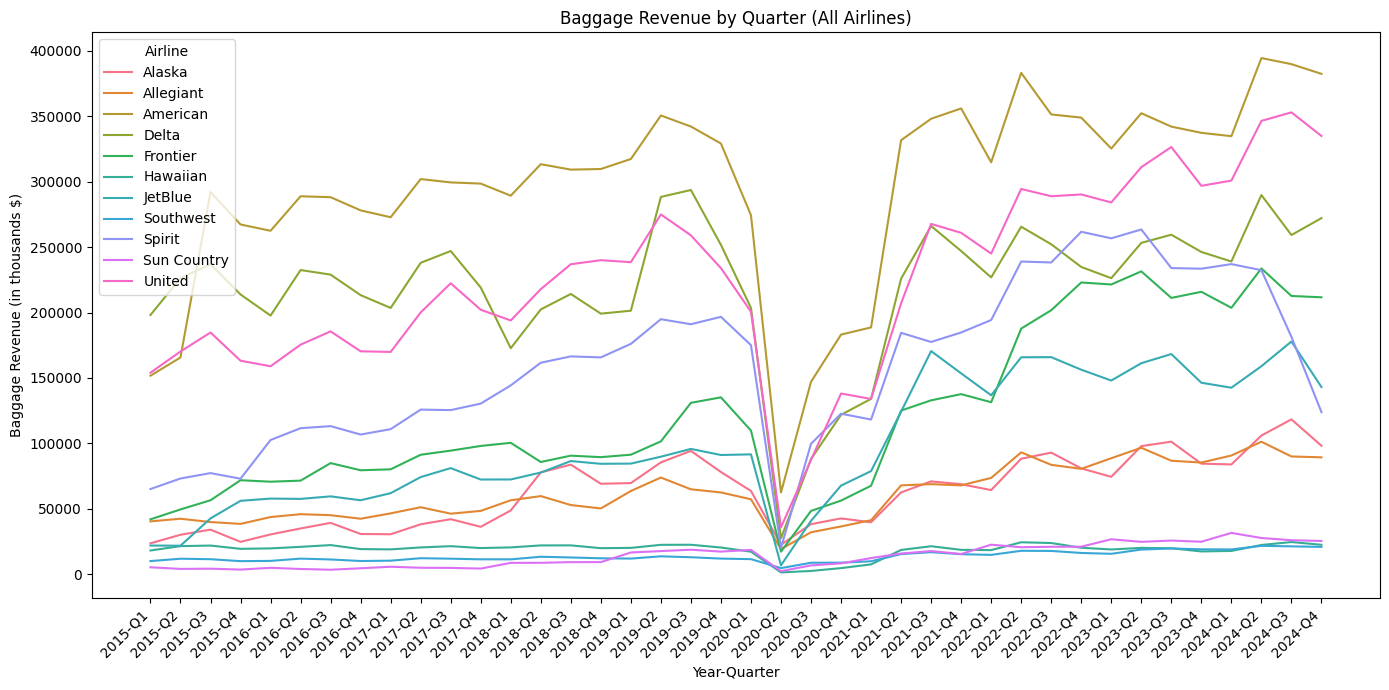

In [3]:
df = pd.read_csv(r'C:\Users\Nav\Documents\BaggageRevenueModel\BaggageRevenueModel\data\combined_bag_revenue.csv')

# # Reshape from wide → long
df_long = df.melt(id_vars='Airline', var_name='Year-Quarter', value_name='Baggage Revenue')

# Plot using seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_long, x='Year-Quarter', y='Baggage Revenue', hue='Airline')

plt.title("Baggage Revenue by Quarter (All Airlines)")
plt.xlabel("Year-Quarter")
plt.ylabel("Baggage Revenue (in thousands $)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Plot only Southwest's Baggage Revenue by Quarter

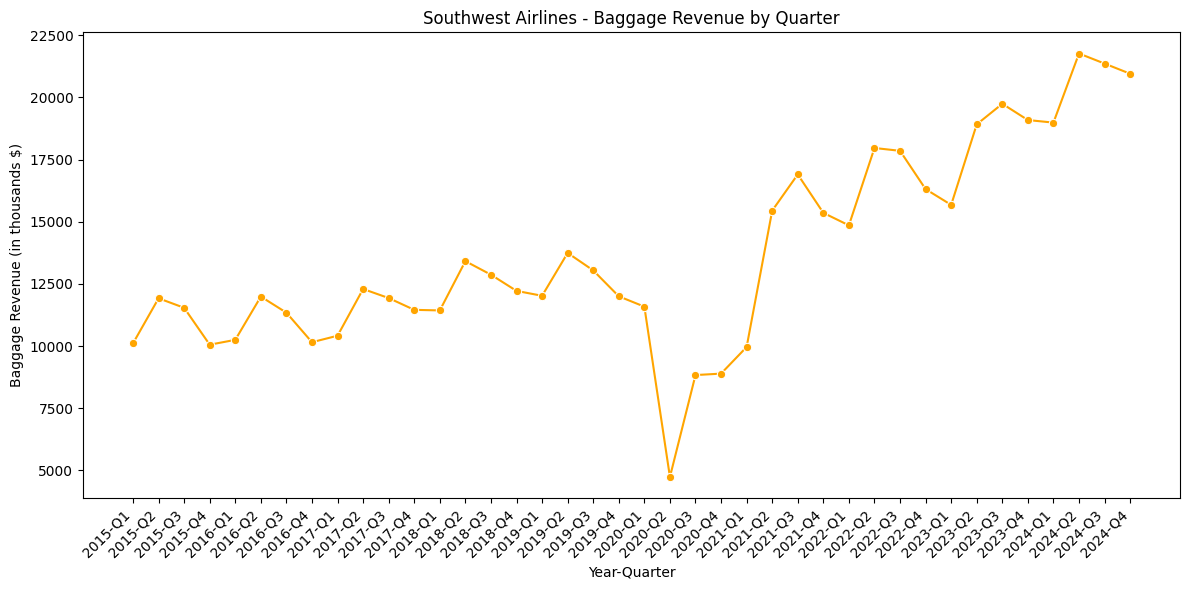

In [4]:
# Filter for Southwest only
southwest_df = df_long[df_long['Airline'].str.lower() == 'southwest']

# Sort quarters chronologically
southwest_df = southwest_df.sort_values(by='Year-Quarter')

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=southwest_df, x='Year-Quarter', y='Baggage Revenue', marker='o', color='orange')

plt.title("Southwest Airlines - Baggage Revenue by Quarter")
plt.xlabel("Year-Quarter")
plt.ylabel("Baggage Revenue (in thousands $)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Decompose Time Series Data into Trend and Seasonality

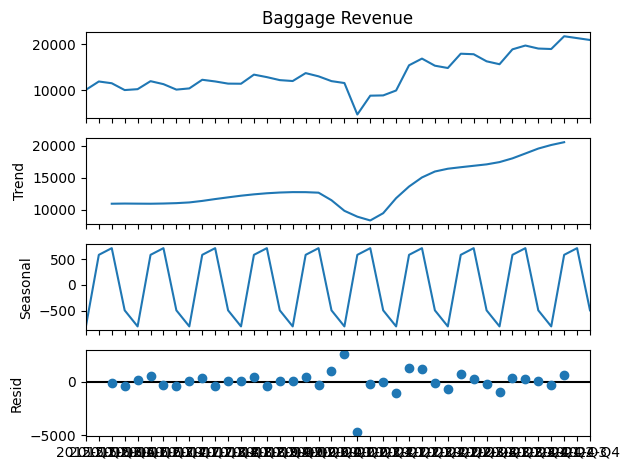

In [5]:
series = southwest_df.set_index('Year-Quarter')['Baggage Revenue']
decomposition = seasonal_decompose(series, model='additive', period=4)
decomposition.plot()
plt.show()